In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plot

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
dataset = pd.read_csv('TikTok_songs_2019.csv')

NameError: name 'pd' is not defined

In [3]:
dataset.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,58.946188,50.192825,0.742673,0.607139,-7.381161,0.650224,5.331839,0.149785,0.250346,0.033455,0.166932,0.582637,122.196578,3.977578,180451.502242
std,18.124862,25.744474,0.140774,0.172197,3.134507,0.477972,3.568786,0.141498,0.269444,0.137376,0.131863,0.218522,27.201311,0.275811,54352.579901
min,0.000000,0.000000,0.247000,0.127000,-19.238000,0.000000,0.000000,0.026100,0.000122,0.000000,0.019400,0.070000,62.619000,1.000000,43427.000000
25%,46.500000,42.500000,0.672000,0.475000,-8.799000,0.000000,2.000000,0.044550,0.030600,0.000000,0.089200,0.397500,102.470500,4.000000,145440.000000
50%,61.000000,58.000000,0.749000,0.603000,-6.735000,1.000000,5.000000,0.087400,0.140000,0.000001,0.117000,0.596000,120.045000,4.000000,177479.000000
75%,72.000000,69.000000,0.859000,0.736000,-5.114000,1.000000,8.000000,0.222000,0.391500,0.000170,0.194000,0.752000,140.574500,4.000000,216779.500000
max,93.000000,90.000000,0.978000,0.983000,-2.180000,1.000000,11.000000,0.730000,0.984000,0.904000,0.826000,0.978000,195.918000,5.000000,410089.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        223 non-null    object 
 1   artist_name       223 non-null    object 
 2   artist_pop        223 non-null    int64  
 3   album             223 non-null    object 
 4   track_pop         223 non-null    int64  
 5   danceability      223 non-null    float64
 6   energy            223 non-null    float64
 7   loudness          223 non-null    float64
 8   mode              223 non-null    int64  
 9   key               223 non-null    int64  
 10  speechiness       223 non-null    float64
 11  acousticness      223 non-null    float64
 12  instrumentalness  223 non-null    float64
 13  liveness          223 non-null    float64
 14  valence           223 non-null    float64
 15  tempo             223 non-null    float64
 16  time_signature    223 non-null    int64  
 1

In [5]:
dataset.isna().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [6]:
corr = dataset.corr(method = "kendall", numeric_only = True)
print(corr)

                  artist_pop  track_pop  danceability    energy  loudness  \
artist_pop          1.000000   0.375729     -0.074930  0.106889  0.216249   
track_pop           0.375729   1.000000     -0.119356  0.098523  0.174546   
danceability       -0.074930  -0.119356      1.000000 -0.084372 -0.040217   
energy              0.106889   0.098523     -0.084372  1.000000  0.501334   
loudness            0.216249   0.174546     -0.040217  0.501334  1.000000   
mode               -0.069815   0.000485     -0.012330 -0.091088 -0.094078   
key                 0.029704  -0.005371     -0.080022 -0.020691 -0.039405   
speechiness        -0.196022  -0.186042      0.326856 -0.014806 -0.040386   
acousticness       -0.003139  -0.063527     -0.167550 -0.242003 -0.191286   
instrumentalness   -0.075750  -0.097006     -0.071296  0.044586 -0.131953   
liveness           -0.040735   0.029955     -0.116536  0.074422  0.026262   
valence            -0.075267  -0.034902      0.049733  0.208053  0.121613   

<AxesSubplot:>

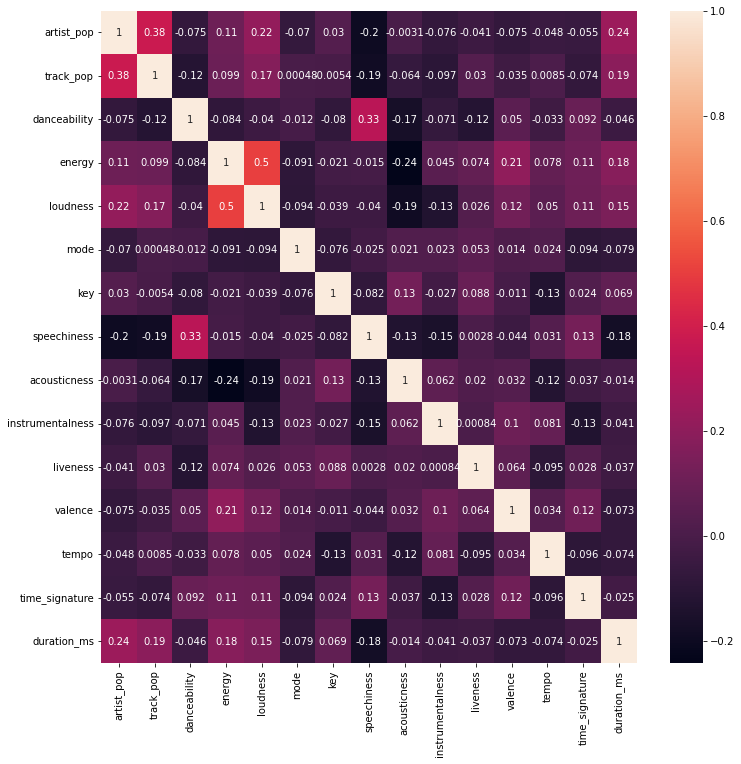

In [7]:
# Heatmap of the correlations between attributes

plot.figure(figsize = (12,12))
seaborn.heatmap(corr, annot = True)

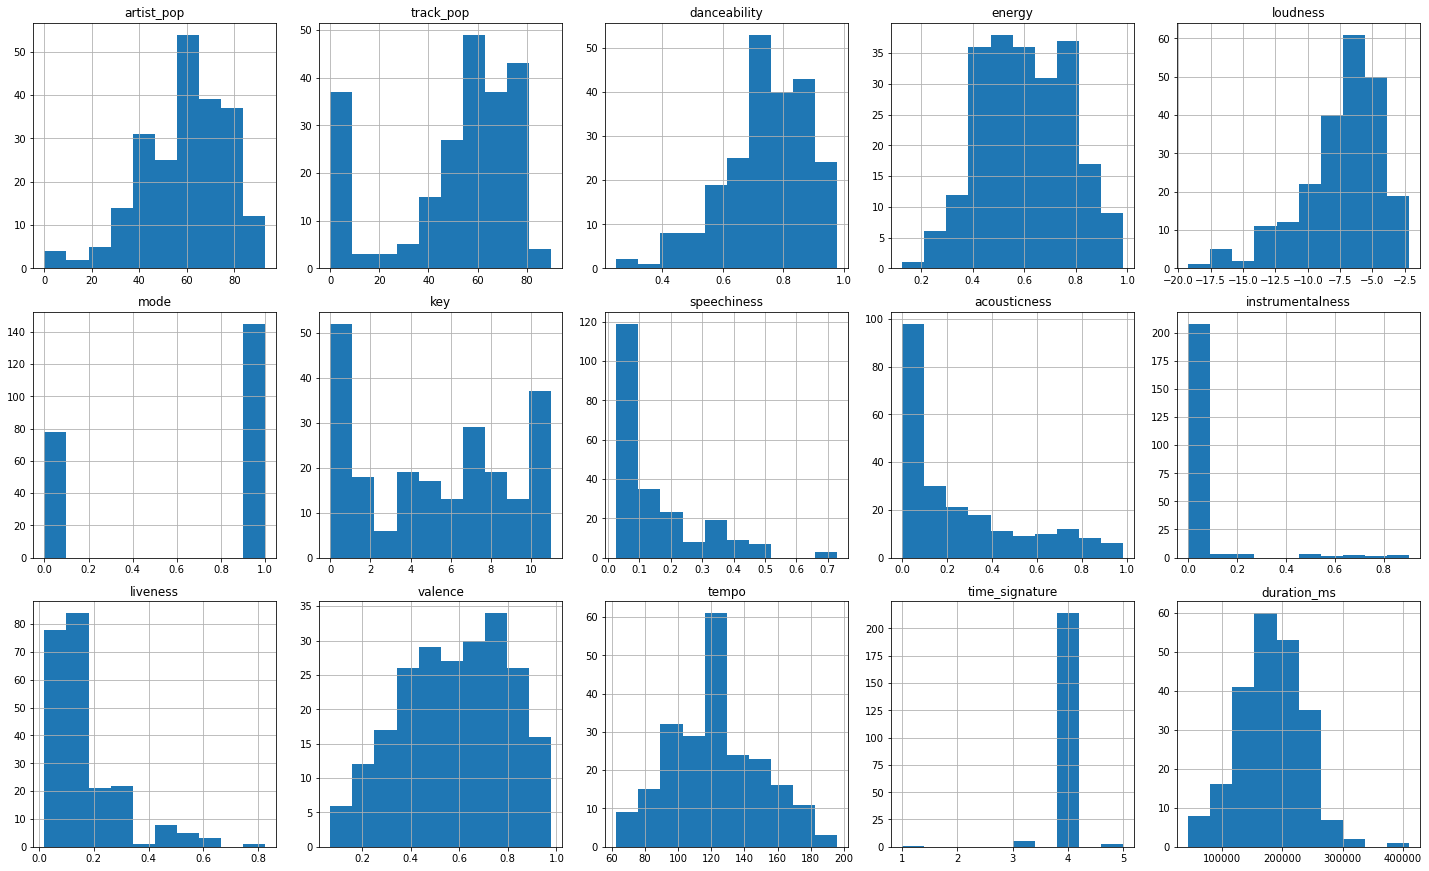

In [8]:
# Distributions of Attributes

column_names = dataset.select_dtypes(include = ['int', 'float'])

def distributions(dataset, attributes, rows, columns):
    fig = plot.figure(figsize = (20, 20))
    for i, attribute in enumerate(attributes):
        subplot = fig.add_subplot(rows, columns, i+1)
        dataset[attribute].hist(bins = 10, ax = subplot)
        subplot.set_title(attribute)
    fig.tight_layout()  
    plot.show()
    
distributions(dataset, column_names, 5, 5)